# Timeseries Analysis (v0.1)

This Kernel show basic analysis on basis of number of tweets/re-tweets per hour

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

### Load CSV data

Encoding="ISO-8859-1" is required due to special characters in `text` column

In [2]:
df_tweets = pd.read_csv('../input/demonetization-tweets.csv', parse_dates=['created'], header=0, encoding="ISO-8859-1")
df_tweets.head(2)

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,801495656976318464,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,801495654778413057,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False


### Pre-process Data

We create new columns namely hour, date & count for our analysis

In [3]:
df_tweets['hour'] = pd.DatetimeIndex(df_tweets['created']).hour
df_tweets['date'] = pd.DatetimeIndex(df_tweets['created']).date
df_tweets['count'] = 1
df_tweets_filtered = df_tweets[['hour', 'date', 'count', 'retweetCount']]
df_tweets_filtered.head(2)

,hour,date,count,retweetCount
0,18,2016-11-23,1,331
1,18,2016-11-23,1,66


### Tweets per hour

Get number of tweets and re-tweets per hour

In [4]:
df_tweets_hourly = df_tweets_filtered.groupby(["hour"]).sum().reset_index()
df_tweets_hourly.head(2)

,hour,count,retweetCount
0,0,76,10070
1,1,93,21082


**Plot graph for number of Tweets/Re-Tweets per hour**

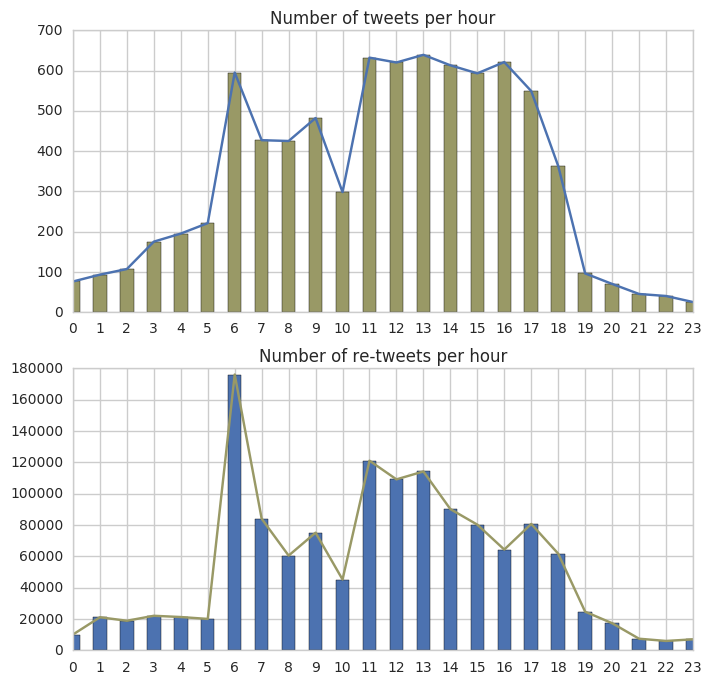

In [5]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

ax1.title.set_text("Number of tweets per hour")
df_tweets_hourly["count"].plot.bar(ax=ax1, color='#999966')
df_tweets_hourly["count"].plot(ax=ax1)

ax2.title.set_text("Number of re-tweets per hour")
df_tweets_hourly["retweetCount"].plot.bar(ax=ax2)
df_tweets_hourly["retweetCount"].plot(ax=ax2, color='#999966')

### Tweets per hour for Dates

Get number of tweets and re-tweets per hour on various dates

In [6]:
pivot_df = df_tweets_filtered.pivot_table(df_tweets_filtered, index=["date", "hour"], aggfunc=np.sum)
print(pivot_df)
dates = pivot_df.index.get_level_values(0).unique()

                 count  retweetCount
date       hour                     
2016-11-22 10       21          6058
           11      318         82888
           12      387         63582
           13      382         70898
           14      349         64110
           15      314         56379
           16      277         38631
           17      260         44812
           18      202         49493
           19       96         24644
           20       70         17301
           21       45          7385
           22       40          5954
           23       25          6991
2016-11-23 0        76         10070
           1        93         21082
           2       107         18859
           3       175         22033
           4       195         21233
           5       221         20021
           6       595        176130
           7       427         84026
           8       425         60479
           9       482         75095
           10      277         39148
 

Above result show that this dataset has only 2 dates

Moreover, Date = 2016-11-22 has hour range from 10 to 23 whereas Date = 2016-11-23 has hour range from 0 to 18

**Lets plot the graph**

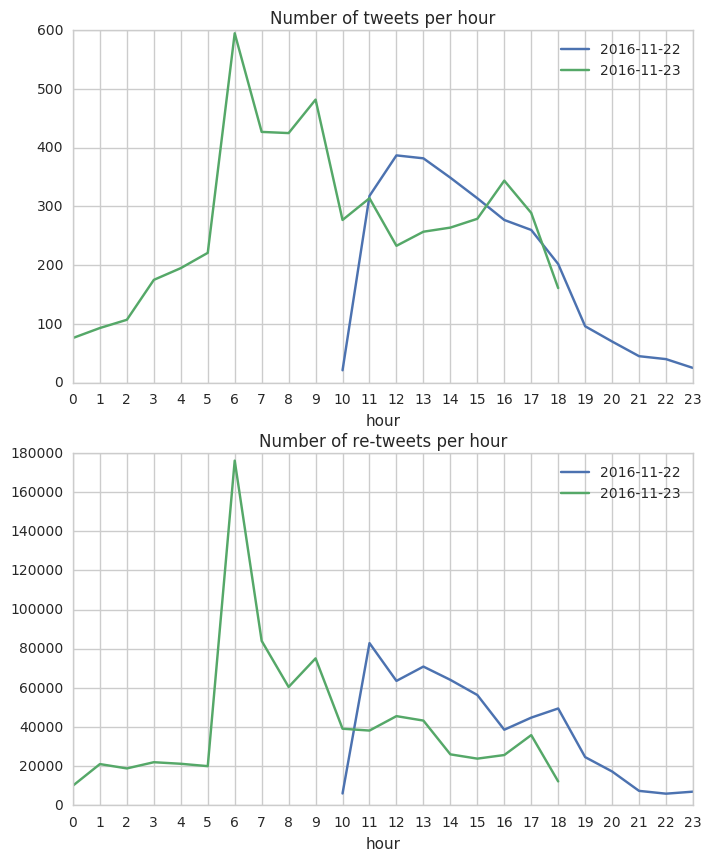

In [7]:
f, ax = plt.subplots(2, 1, figsize=(8, 10))
plt.setp(ax, xticks=list(range(0,24)))

ax[0].title.set_text("Number of tweets per hour")
ax[1].title.set_text("Number of re-tweets per hour")

for date in dates:
    split = pivot_df.xs(date)
    
    split["count"].plot(ax=ax[0], legend=True, label='' + str(date))
    split["retweetCount"].plot(ax=ax[1], legend=True, label='' + str(date))    